In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\Datasets\kerala.csv")

In [4]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [6]:
df.shape

(118, 16)

In [13]:
#What is avg rainfall for each month over years
cols = ['JAN',	'FEB',	'MAR',	'APR',	'MAY',	'JUN',	'JUL',	'AUG',	'SEP',	'OCT',	'NOV',	'DEC']

In [18]:
monthly_avg = df[cols].mean()
monthly_avg

JAN     12.218644
FEB     15.633898
MAR     36.670339
APR    110.330508
MAY    228.644915
JUN    651.617797
JUL    698.220339
AUG    430.369492
SEP    246.207627
OCT    293.207627
NOV    162.311017
DEC     40.009322
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

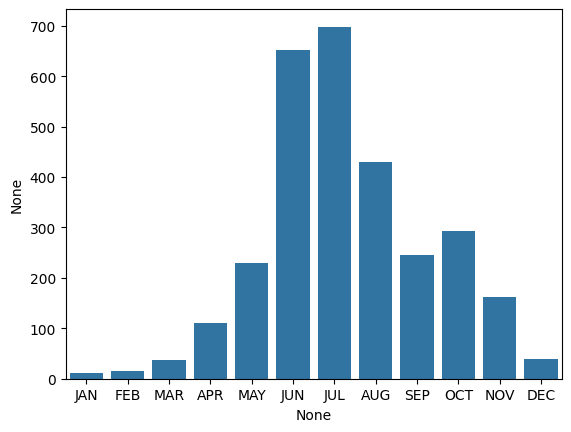

In [23]:
sns.barplot(
    x = monthly_avg.index,
    y = monthly_avg
    )
plt.show

1. We see higher rains in June and July
2. Jan and Feb have the lowest rains
3. Aug and Sep also have high rains but less relative to June and July


In [30]:
#Oct has higher rain than Sep ?? Explanation

c = df.columns.tolist()

df2 = df[c[1:14]]
df2.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [32]:
df3 = pd.melt(df2, 
              id_vars=["YEAR"],
              value_vars= ['JAN','FEB',	'MAR',	'APR',	'MAY',	'JUN',	'JUL',	'AUG',	'SEP',	'OCT',	'NOV',	'DEC'],
              var_name='MONTH_ABBR',
              value_name="VALUE")

df3

,YEAR,MONTH_ABBR,VALUE
0,1901,JAN,28.7
1,1902,JAN,6.7
2,1903,JAN,3.2
3,1904,JAN,23.7
4,1905,JAN,1.2
...,...,...,...
1411,2014,DEC,47.2
1412,2015,DEC,79.4
1413,2016,DEC,23.6
1414,2017,DEC,38.1


C:\Users\nikhi\AppData\Local\Temp\ipykernel_6328\567691978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df3,


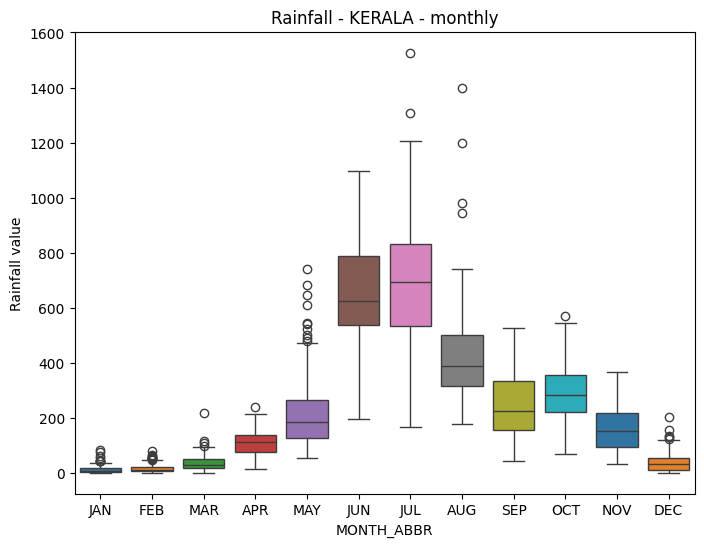

In [42]:
fig, ax = plt.subplots(1,1,figsize = (8, 6))
sns.boxplot(data = df3,
            x = "MONTH_ABBR",
            y = df3.VALUE,
            ax=ax,
            palette="tab10")

ax.set_ylabel('Rainfall value')
ax.set_title('Rainfall - KERALA - monthly')

plt.show()

> This proves that there are not many outliers for the Oct month and the data seems to be consistent, the reason for Oct having more rains can be due to the retreating monsoon effects.

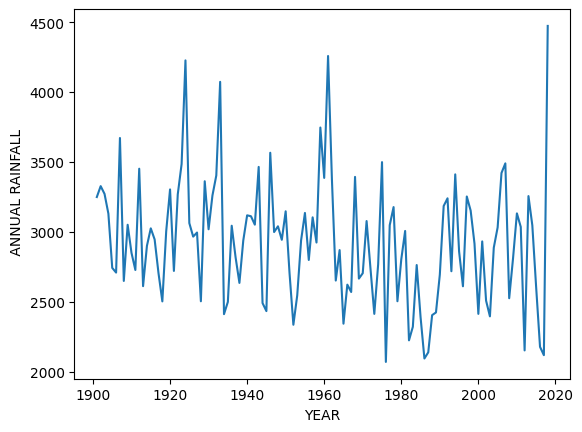

In [46]:
#YEAR WISE TREND

sns.lineplot(
    data = df,
    x = "YEAR",
    y = " ANNUAL RAINFALL")

plt.show()

In [49]:
impact_cols = ['YEAR', 'JUN', 'JUL',
       'OCT', ' ANNUAL RAINFALL', 'FLOODS']

In [51]:
df4 = df[impact_cols]
df4

,YEAR,JUN,JUL,OCT,ANNUAL RAINFALL,FLOODS
0,1901,824.6,743.0,266.9,3248.6,YES
1,1902,390.9,1205.0,358.4,3326.6,YES
2,1903,558.6,1022.5,354.1,3271.2,YES
3,1904,1098.2,725.5,328.1,3129.7,YES
4,1905,850.2,520.5,383.5,2741.6,NO
...,...,...,...,...,...,...
113,2014,454.4,677.8,355.5,3046.4,YES
114,2015,563.6,406.0,308.1,2600.6,NO
115,2016,522.2,412.3,225.9,2176.6,NO
116,2017,498.5,319.6,192.4,2117.1,NO


In [52]:
threshold_jun = df4['JUN'].median().astype(int)
threshold_jul = df4['JUL'].median().astype(int)
threshold_oct = df4['OCT'].median().astype(int)
threshold_ar = df4[' ANNUAL RAINFALL'].median().astype(int)

threshold_jun, threshold_jul, threshold_oct, threshold_ar

(625, 691, 284, 2934)

In [55]:
thresholds = {
    'JUN' : 625,
    'JUL' : 691,
    'OCT' : 284,
    ' ANNUAL RAINFALL' : 2934
}

In [61]:
# converting data to categories of high or low rainfall

for col, threshold in thresholds.items():
    df4[col] = (df4[col] > threshold).astype(int)

df4

C:\Users\nikhi\AppData\Local\Temp\ipykernel_6328\3512442612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col] = (df4[col] > threshold).astype(int)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_6328\3512442612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col] = (df4[col] > threshold).astype(int)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_6328\3512442612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,YEAR,JUN,JUL,OCT,ANNUAL RAINFALL,FLOODS
0,1901,1,1,0,1,YES
1,1902,0,1,1,1,YES
2,1903,0,1,1,1,YES
3,1904,1,1,1,1,YES
4,1905,1,0,1,0,NO
...,...,...,...,...,...,...
113,2014,0,0,1,1,YES
114,2015,0,0,1,0,NO
115,2016,0,0,0,0,NO
116,2017,0,0,0,0,NO


In [76]:
data = df4

In [77]:
mask = ((data['JUN'] == 1) | (data['JUL'] == 1) | (data['OCT'] == 1) & (data[' ANNUAL RAINFALL'] == 1))

mask

0       True
1       True
2       True
3       True
4       True
       ...  
113     True
114    False
115    False
116    False
117     True
Length: 118, dtype: bool

In [78]:
data = data[mask]
data.head()

,YEAR,JUN,JUL,OCT,ANNUAL RAINFALL,FLOODS
0,1901,1,1,0,1,YES
1,1902,0,1,1,1,YES
2,1903,0,1,1,1,YES
3,1904,1,1,1,1,YES
4,1905,1,0,1,0,NO


In [79]:
data.shape

(90, 6)

In [80]:
pd.crosstab(
    index = data['JUN'],
    columns = data['FLOODS'],
    margins = True,
    margins_name = 'Total'
)

FLOODS,NO,YES,Total
JUN,,,
0,17,13,30
1,16,44,60
Total,33,57,90


In [82]:
# Calculating probability of floods given rainfall is higher than median in June

prob = 44/60

prob

0.7333333333333333

In [83]:
#Normalization

pd.crosstab(
    index = data['JUN'],
    columns = data['FLOODS'],
    margins = True,
    normalize = 'index'
)

FLOODS,NO,YES
JUN,,
0,0.566667,0.433333
1,0.266667,0.733333
All,0.366667,0.633333


In [84]:

pd.crosstab(
    index = data['JUN'],
    columns = data['FLOODS'],
    margins = True,
    normalize = 'columns'
)

FLOODS,NO,YES,All
JUN,,,
0,0.515152,0.22807,0.333333
1,0.484848,0.77193,0.666667
